In [1]:
# THIS NOTEBOOK SHOWS EXAMPLES OF CUSTOM AND PYTHON FUNCTIONS APPLICATION FOR THE PURPOSES OF MRI PROJECT

In [1]:
# Expanding visibility zone for Python engine to make HH Modules seen
import sys 
sys.path.append('../..')

In [2]:
# Importing functions from hh_dates HH Module
from HH_Modules.hh_dates import hh_create_bus_dates
from HH_Modules.hh_dates import hh_drop_nyse_closures
from HH_Modules.hh_files import hh_get_xlsx_risk_events
from HH_Modules.hh_files import hh_get_country_codes
from HH_Modules.hh_files import hh_get_msci_index_membership
from HH_Modules.hh_files import hh_get_msci_reclassification
from HH_Modules.hh_files import hh_get_msci_returns
from HH_Modules.hh_ts import hh_missing_data_manager
from HH_Modules.hh_ts import hh_rolling_percentile
from HH_Modules.hh_ts import hh_rolling_simple_MA
from HH_Modules.hh_ts import hh_rolling_z_score
from HH_Modules.hh_mri import hh_build_mri_from_model
from HH_Modules.hh_mri import hh_standartize_mri_data
from HH_Modules.hh_mri import hh_aggregate_mri_data
from HH_Modules.hh_mri import hh_matplotlib_mri_data
from HH_Modules.hh_mri import hh_bokeh_mri_data

In [3]:
# Importing standard modules and date-special modules
import numpy as np
import pandas as pd
from datetime import date
from datetime import timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import bokeh.plotting as b_pl

In [5]:
# Examples of using hh_dates function hh_create_bus_dates
date_format = '%Y-%m-%d'
null_date_ML_number = 693962
null_date_stamp = date(1900, 1, 1)
first_date_stamp = date(1998, 1, 1)
last_date_stamp = date(2018, 12, 31)
standart_date_stamp = date(2001, 1, 1)
null_date = null_date_stamp.strftime(date_format)
first_date = first_date_stamp.strftime(date_format)
last_date = last_date_stamp.strftime(date_format)
standart_date = standart_date_stamp.strftime(date_format)

date_index_days_str = hh_create_bus_dates('string', first_date, last_date, 'day')
date_index_weeks_str = hh_create_bus_dates('string', first_date, last_date, 'week')
date_index_monthes_str = hh_create_bus_dates('string', first_date, last_date, 'month')
date_index_quarters_str = hh_create_bus_dates('string', first_date, last_date, 'quarter')
date_index_years_str = hh_create_bus_dates('string', first_date, last_date, 'year')

date_index_days_date = hh_create_bus_dates('date', first_date_stamp, last_date_stamp, 'day')
date_index_weeks_date = hh_create_bus_dates('date', first_date_stamp, last_date_stamp, 'week')
date_index_monthes_date = hh_create_bus_dates('date', first_date_stamp, last_date_stamp, 'month')
date_index_quarters_date = hh_create_bus_dates('date', first_date_stamp, last_date_stamp, 'quarter')
date_index_years_date = hh_create_bus_dates('date', first_date_stamp, last_date_stamp, 'year')

print('First date: ', first_date)
print('Last date: ', last_date)
print('Business days (string type): ', date_index_days_str)
print('Business weeks ends (date type): ', date_index_weeks_date)
print('Business monthes ends (string type): ', date_index_monthes_str)
print('Business quarters ends (date type): ', date_index_quarters_date)
print('Business years ends (string type): ', date_index_years_str)

hh_create_bus_dates: Business dates index for period from 1998-01-01 to 2018-12-31 with day interval successfully generated
hh_create_bus_dates: Business dates index for period from 1998-01-01 to 2018-12-31 with week interval successfully generated
hh_create_bus_dates: Business dates index for period from 1998-01-01 to 2018-12-31 with month interval successfully generated
hh_create_bus_dates: Business dates index for period from 1998-01-01 to 2018-12-31 with quarter interval successfully generated
hh_create_bus_dates: Business dates index for period from 1998-01-01 to 2018-12-31 with year interval successfully generated
hh_create_bus_dates: Business dates index for period from 1998-01-01 to 2018-12-31 with day interval successfully generated
hh_create_bus_dates: Business dates index for period from 1998-01-01 to 2018-12-31 with week interval successfully generated
hh_create_bus_dates: Business dates index for period from 1998-01-01 to 2018-12-31 with month interval successfully generat

In [6]:
# Generating Timeseries for comparing MatLab and Python hh_create_bus_dates functionality
calendar_delta = first_date_stamp - null_date_stamp

date_index_calendar_days = pd.date_range(first_date, last_date, freq = 'D')

ser_all_days = pd.Series(np.arange(date_index_calendar_days.size) + null_date_ML_number + calendar_delta.days, 
                         index = date_index_calendar_days.date, name = 'ML Numbers')

ser_bus_days = ser_all_days[date_index_days_str]
ser_bus_days.index.name = 'Business Dates'
ser_bus_days.head(), ser_bus_days.tail()

(Business Dates
 1998-01-01    729756
 1998-01-02    729757
 1998-01-05    729760
 1998-01-06    729761
 1998-01-07    729762
 Freq: B, Name: ML Numbers, dtype: int32, Business Dates
 2018-12-25    737419
 2018-12-26    737420
 2018-12-27    737421
 2018-12-28    737422
 2018-12-31    737425
 Freq: B, Name: ML Numbers, dtype: int32)

In [7]:
# Generating xlsx file for comparing MatLab and Python hh_create_bus_dates functionality on example of business days daily
xls_writer = pd.ExcelWriter('Data_Files/Test_Files/bus_dts.xlsx')
ser_bus_days.to_excel(xls_writer, 'daily')
xls_writer.save()

In [8]:
# Examples of using hh_dates function hh_drop_nyse_closures
calendar_delta = first_date_stamp - null_date_stamp

date_nyse_index_days = hh_drop_nyse_closures(date_index_days_str)
ser_bus_nyse_days = pd.Series(0, index = date_nyse_index_days.date, name = 'ML Numbers')
ser_bus_nyse_days.index.name = 'Business Dates Wihtout NYSE Closures'
ser_bus_nyse_days.head(), ser_bus_nyse_days.tail()

hh_drop_nyse_closures: NYSE closure dates successfully dropped from date index


(Business Dates Wihtout NYSE Closures
 1998-01-02    0
 1998-01-05    0
 1998-01-06    0
 1998-01-07    0
 1998-01-08    0
 Name: ML Numbers, dtype: int64, Business Dates Wihtout NYSE Closures
 2018-12-24    0
 2018-12-26    0
 2018-12-27    0
 2018-12-28    0
 2018-12-31    0
 Name: ML Numbers, dtype: int64)

In [9]:
# Generating xlsx file for comparing MatLab and Python hh_drop_nyse_closures functionality on example of business days daily
xls_writer = pd.ExcelWriter('Data_Files/Test_Files/bus_nyse_dts.xlsx')
ser_bus_nyse_days.to_excel(xls_writer, 'daily')
xls_writer.save()
# identified one discrepancy: 2018-12-05 - NYSE closure day for Python library and valid business day for MatLab function

In [10]:
# Examples of using hh_ts function hh_missing_data_manager
df_substitution_test = pd.DataFrame(np.arange(15).reshape(5, 3), index = date_index_days_str[:5], columns = ['Atos', 'Portos', 'Aramis'])
df_substitution_test.iloc[:2, 0] = 30
df_substitution_test.iloc[4, 2] = 10
df_substitution_test.iloc[1, 2] = np.NaN
df_substitution_test.iloc[2, :] = np.NaN
df_substitution_test.iloc[4, :2] = np.NaN
df_substitution_test

Atos  Portos  Aramis
Business Dates                      
1998-01-01      30.0     1.0     2.0
1998-01-02      30.0     4.0     NaN
1998-01-05       NaN     NaN     NaN
1998-01-06       9.0    10.0    11.0
1998-01-07       NaN     NaN    10.0

In [11]:
df_substituted_clear = hh_missing_data_manager(df_substitution_test, manage_option = 'clear')
df_substituted_clear

hh_missing_data_manager: np.Nan substitution with option clear performed successfully
hh_missing_data_manager: Overall count of actual np.Nan values in data table is 0


Atos  Portos  Aramis
Business Dates                      
1998-01-01      30.0     1.0     2.0
1998-01-06       9.0    10.0    11.0

In [12]:
df_substituted_mean = hh_missing_data_manager(df_substitution_test, manage_option = 'mean')
df_substituted_mean

hh_missing_data_manager: np.Nan substitution with option mean performed successfully
hh_missing_data_manager: Overall count of actual np.Nan values in data table is 0


Atos  Portos     Aramis
Business Dates                         
1998-01-01      30.0     1.0   2.000000
1998-01-02      30.0     4.0   7.666667
1998-01-05      23.0     5.0   7.666667
1998-01-06       9.0    10.0  11.000000
1998-01-07      23.0     5.0  10.000000

In [13]:
df_substituted_median = hh_missing_data_manager(df_substitution_test, manage_option = 'median')
df_substituted_median

hh_missing_data_manager: np.Nan substitution with option median performed successfully
hh_missing_data_manager: Overall count of actual np.Nan values in data table is 0


Atos  Portos  Aramis
Business Dates                      
1998-01-01      30.0     1.0     2.0
1998-01-02      30.0     4.0    10.0
1998-01-05      30.0     4.0    10.0
1998-01-06       9.0    10.0    11.0
1998-01-07      30.0     4.0    10.0

In [14]:
df_substituted_previous = hh_missing_data_manager(df_substitution_test, manage_option = 'previous')
df_substituted_previous

hh_missing_data_manager: np.Nan substitution with option previous performed successfully
hh_missing_data_manager: Overall count of actual np.Nan values in data table is 0


Atos  Portos  Aramis
Business Dates                      
1998-01-01      30.0     1.0     2.0
1998-01-02      30.0     4.0     2.0
1998-01-05      30.0     4.0     2.0
1998-01-06       9.0    10.0    11.0
1998-01-07       9.0    10.0    10.0

In [15]:
df_substituted_previous_lag = hh_missing_data_manager(df_substitution_test, manage_option = 'previous', prev_lag = 1)
df_substituted_previous_lag

hh_missing_data_manager: np.Nan substitution with option previous performed successfully
hh_missing_data_manager: Overall count of actual np.Nan values in data table is 1


Atos  Portos  Aramis
Business Dates                      
1998-01-01      30.0     1.0     2.0
1998-01-02      30.0     4.0     2.0
1998-01-05      30.0     4.0     NaN
1998-01-06       9.0    10.0    11.0
1998-01-07       9.0    10.0    10.0

In [16]:
# Example of using hh_mri function hh_build_mri_from_model: choose commented True alternative option to regenerate h5 file from xlsx
path_mri_data_xlsx = 'Data_Files/Source_Files/mri_data.xlsx'
mri_model_name = 'Model 01'
path_mri_data_hdf = 'Data_Files/Source_Files/mri_data.h5'
object_mri_data_hdf = 'source_data'
#[df_model_asset, df_model_MRI, df_selected_data] = hh_build_mri_from_model(path_mri_data_xlsx, mri_model_name, 
#                                                                           path_mri_data_hdf, object_mri_data_hdf, date_nyse_index_days, True)
[df_model_asset, df_model_MRI, df_selected_data] = hh_build_mri_from_model(path_mri_data_xlsx, mri_model_name, 
                                                                           path_mri_data_hdf, object_mri_data_hdf, date_nyse_index_days, False)

hh_build_mri_from_model: Model profile successfully read
hh_build_mri_from_model: Group border rows successfully dropped
hh_build_mri_from_model: Group sum weights control successfully performed
hh_build_mri_from_model: Model asset part extracted
hh_build_mri_from_model: Model MRI part extracted
hh_build_mri_from_model: HDF5 file taken as is because of update refusing
hh_build_mri_from_model: Limited data from HDF5 file Data_Files/Source_Files/mri_data.h5 extracted successfully
hh_build_mri_from_model: Missed border date rows in limited data table added
hh_missing_data_manager: np.Nan substitution with option previous performed successfully
hh_missing_data_manager: Overall count of actual np.Nan values in data table is 7252
hh_build_mri_from_model: Missed data in limited data table filled successfully


In [17]:
# START AVOID BOUNDARY
############################################################################################################################################################################

In [18]:
df_selected_data.head(), df_selected_data.tail()

(            iv_us  iv_eu  iv_uk  iv_jp  iv_rvx  iv_eem  oas_em  oas_hy  \
 Date                                                                     
 1998-01-02  23.42    NaN    NaN    NaN     NaN     NaN     NaN    2.88   
 1998-01-05  24.36    NaN    NaN    NaN     NaN     NaN     NaN    2.88   
 1998-01-06  25.66    NaN    NaN    NaN     NaN     NaN     NaN    2.88   
 1998-01-07  25.07    NaN    NaN    NaN     NaN     NaN     NaN    2.88   
 1998-01-08  26.01    NaN    NaN    NaN     NaN     NaN     NaN    2.88   
 
             fx_gbp  fx_eur  fx_jpy  fx_chf  
 Date                                        
 1998-01-02    9.85     NaN  13.500   11.05  
 1998-01-05   10.05     NaN  14.350   11.45  
 1998-01-06   10.40     NaN  14.575   12.05  
 1998-01-07   10.45     NaN  14.500   12.05  
 1998-01-08   10.45     NaN  14.600   11.75  ,
             iv_us    iv_eu   iv_uk  iv_jp  iv_rvx  iv_eem  oas_em  oas_hy  \
 Date                                                                   

In [19]:
# Generating xlsx file for comparing MatLab and Python hh_build_mri_from_model functionality
xls_writer = pd.ExcelWriter('Data_Files/Test_Files/extracted_and_filled.xlsx')
df_selected_data.to_excel(xls_writer, 'Python')
xls_writer.save()
# No discrepancies identified except earlier 2018-12-05 question - NYSE closure for Python library and valid business day for MatLab function

In [20]:
df_model_asset

Asset Group Asset Group Description Asset Code Asset Tab Name  \
0           EQ     MRI Equity IVol Grp      iv_us            VIX   
1           EQ     MRI Equity IVol Grp      iv_eu            V2X   
2           EQ     MRI Equity IVol Grp      iv_uk          VFTSE   
3           EQ     MRI Equity IVol Grp      iv_jp           VNKY   
4           EQ     MRI Equity IVol Grp     iv_rvx            RVX   
5           EQ     MRI Equity IVol Grp     iv_eem          VXEEM   
6           FI    MRI Fixed Income Grp     oas_em        EMUSOAS   
7           FI    MRI Fixed Income Grp     oas_hy        LF98OAS   
8           FX      MRI FOREX IVol Grp     fx_gbp         GBPUSD   
9           FX      MRI FOREX IVol Grp     fx_eur         EURUSD   
10          FX      MRI FOREX IVol Grp     fx_jpy         USDJPY   
11          FX      MRI FOREX IVol Grp     fx_chf         USDCHF   

                        Asset Desc Processing Routine  Factor Weights  
0         CBOE SPX VOLATILITY INDX                  x        0.166667  
1                     VSTOXX Index                  x        0.166667  
2         FTSE100 Volatility Index                  x        0.166667  
3          NIKKEI Volatility Index                  x        0.166667  
4         CBOE RSL2000 VOLATILTY I                  x        0.166667  
5           CBOE EM ETF Volatility                  x        0.166667  
6   Bloomberg Barclays EM USD Aggr                  x        0.500000  
7   Bloomberg Barclays US Corporat                  x        0.500000  
8               GBP-USD OPT VOL 3M                  x        0.250000  
9               EUR-USD OPT VOL 3M                  x        0.250000  
10              USD-JPY OPT VOL 3M                  x        0.250000  
11              USD-CHF OPT VOL 3M                  x        0.250000

In [21]:
df_model_MRI

Asset Group Asset Group Description Asset Code Asset Tab Name  \
0         MRI   Market Risk Indicator         EQ            NaN   
1         MRI   Market Risk Indicator         FI            NaN   
2         MRI   Market Risk Indicator         FX            NaN   

             Asset Desc Processing Routine  Factor Weights  
0   MRI Equity IVol Grp                  x        0.333333  
1  MRI Fixed Income Grp                  x        0.333333  
2    MRI FOREX IVol Grp                  x        0.333333

In [22]:
# Example of using hh_ts function hh_rolling_percentile
ser_ranks_less_any = hh_rolling_percentile(df_selected_data['iv_eu'], 252, 252000, min_interpretation = 'any', manage_option = 'less', show_report = True)
ser_ranks_less_equal_any = hh_rolling_percentile(df_selected_data['iv_eu'], 252, 252000, min_interpretation = 'any', manage_option = 'less_equal', show_report = True)
ser_ranks_mean_any = hh_rolling_percentile(df_selected_data['iv_eu'], 252, 252000, min_interpretation = 'any', manage_option = 'mean', show_report = True)
ser_ranks_wnd_any = hh_rolling_percentile(df_selected_data['iv_us'], 30, 60, min_interpretation = 'any', manage_option = 'mean', show_report = True)
ser_ranks_less_notNaN = hh_rolling_percentile(df_selected_data['iv_eu'], 252, 252000, manage_option = 'less', show_report = True)
ser_ranks_less_equal_notNaN = hh_rolling_percentile(df_selected_data['iv_eu'], 252, 252000, manage_option = 'less_equal', show_report = True)
ser_ranks_mean_notNaN = hh_rolling_percentile(df_selected_data['iv_eu'], 252, 252000, manage_option = 'mean', show_report = True)
ser_ranks_wnd_notNaN = hh_rolling_percentile(df_selected_data['iv_us'], 30, 60, manage_option = 'mean', show_report = True)

hh_rolling_percentile: Percentile rank calculation with min_interpretation any and option less performed successfully
hh_rolling_percentile: Percentile rank calculation with min_interpretation any and option less_equal performed successfully
hh_rolling_percentile: Percentile rank calculation with min_interpretation any and option mean performed successfully
hh_rolling_percentile: Percentile rank calculation with min_interpretation any and option mean performed successfully
hh_rolling_percentile: Percentile rank calculation with min_interpretation not_NaN and option less performed successfully
hh_rolling_percentile: Percentile rank calculation with min_interpretation not_NaN and option less_equal performed successfully
hh_rolling_percentile: Percentile rank calculation with min_interpretation not_NaN and option mean performed successfully
hh_rolling_percentile: Percentile rank calculation with min_interpretation not_NaN and option mean performed successfully


In [23]:
# Generating xlsx file for comparing MatLab and Python hh_rolling_percentile functionality
xls_writer = pd.ExcelWriter('Data_Files/Test_Files/python_pctiles.xlsx')
ser_ranks_less_any.to_excel(xls_writer, 'Less any')
ser_ranks_less_equal_any.to_excel(xls_writer, 'Less_Equal any')
ser_ranks_mean_any.to_excel(xls_writer, 'Mean any')
ser_ranks_wnd_any.to_excel(xls_writer, 'Short_Window any')
ser_ranks_less_notNaN.to_excel(xls_writer, 'Less not NaN')
ser_ranks_less_equal_notNaN.to_excel(xls_writer, 'Less_Equal not NaN')
ser_ranks_mean_notNaN.to_excel(xls_writer, 'Mean not NaN')
ser_ranks_wnd_notNaN.to_excel(xls_writer, 'Short_Window not NaN')
xls_writer.save()

In [24]:
# Example of using hh_ts function hh_rolling_simple_MA
ser_SMA_long_any = hh_rolling_simple_MA(np.log(df_selected_data['iv_eu']), 252, 252000, min_interpretation = 'any', show_report = True)
ser_SMA_short_any = hh_rolling_simple_MA(np.log(df_selected_data['iv_us']), 30, 60, min_interpretation = 'any', factor_period = 'day', show_report = True)
ser_SMA_long_notNaN = hh_rolling_simple_MA(np.log(df_selected_data['iv_eu']), 252, 252000, show_report = True)
ser_SMA_short_notNaN = hh_rolling_simple_MA(np.log(df_selected_data['iv_us']), 30, 60, factor_period = 'day', show_report = True)

hh_rolling_simple_MA: Moving average calculation with min_interpretation any performed successfully
hh_rolling_simple_MA: Moving average calculation with min_interpretation any performed successfully
hh_rolling_simple_MA: Moving average calculation with min_interpretation not_NaN performed successfully
hh_rolling_simple_MA: Moving average calculation with min_interpretation not_NaN performed successfully


In [25]:
# Generating xlsx file for comparing MatLab and Python hh_rolling_simple_MA functionality
xls_writer = pd.ExcelWriter('Data_Files/Test_Files/python_SMA.xlsx')
ser_SMA_long_any.to_excel(xls_writer, 'SMA long any')
ser_SMA_short_any.to_excel(xls_writer, 'SMA short any')
ser_SMA_long_notNaN.to_excel(xls_writer, 'SMA long not NaN')
ser_SMA_short_notNaN.to_excel(xls_writer, 'SMA short not NaN')
xls_writer.save()

In [26]:
# Example of using hh_ts function hh_rolling_z_score
[df_z_score, df_z_matrix] = hh_rolling_z_score(np.log(df_selected_data['iv_us']), min_wnd = 252, max_wnd = 25200, winsor_option = 'value', winsor_bottom = -5, 
                                               winsor_top = 5, fill_option = 'backfill', show_report = True)

hh_rolling_z_score: Mean, Std and Z Score series calculated successfully
hh_rolling_z_score: Z Matrix values calculated successfully
hh_rolling_z_score: Rolling winsorized Z Score series calculated successfully
hh_rolling_z_score: Calculating Z Score data with winsor_option value and fill_option backfill performed successfully


In [27]:
# Generating xlsx file for comparing MatLab and Python hh_rolling_z_score functionality
xls_writer = pd.ExcelWriter('Data_Files/Test_Files/python_Z_score.xlsx')
df_z_score.to_excel(xls_writer, 'Z Score series')
df_z_matrix.iloc[[0, 251, 252, 253, 501, 502, 503, 504, 5281, 5282], :].to_excel(xls_writer, 'Z Matrix')
xls_writer.save()

In [28]:
roll_window_min = 252 # One business year
roll_window_max = 252 * 100 # Hundred business years
winsor_bound_bottom = -5
winsor_bound_top = 5

In [29]:
# Example of using hh_ts function hh_standartize_mri_data
path_mri_standart_hdf = 'Data_Files/Source_Files/mri_group_z_matrix.h5'
[df_standartized_assets, df_diag_mean_z_groups, df_percentiled_groups] = hh_standartize_mri_data(df_model_asset, df_selected_data, standart_date, roll_window_min, 
                                                                                                 roll_window_max, winsor_bound_bottom, winsor_bound_top, 
                                                                                                 path_mri_standart_hdf)

hh_standartize_mri_data: basic asset for group EQ determined succesfully: iv_us
hh_standartize_mri_data: basic asset for group FI determined succesfully: oas_hy
hh_standartize_mri_data: basic asset for group FX determined succesfully: fx_gbp
hh_standartize_mri_data: group EQ standartizing started
hh_standartize_mri_data: asset iv_us in group EQ standartized successfully
hh_standartize_mri_data: asset iv_eu in group EQ standartized successfully
hh_standartize_mri_data: asset iv_uk in group EQ standartized successfully
hh_standartize_mri_data: asset iv_jp in group EQ standartized successfully
hh_standartize_mri_data: asset iv_rvx in group EQ standartized successfully
hh_standartize_mri_data: asset iv_eem in group EQ standartized successfully
hh_standartize_mri_data: weighted mean matrix for group EQ builded successfully
hh_standartize_mri_data: z-score matrix for group EQ weighted mean matrix builded successfully
hh_standartize_mri_data: z-score matrix for group EQ saved to HDF5 file Dat

In [30]:
df_standartized_assets.head(), df_standartized_assets.tail()

(Asset Code  Date      
 iv_us       1998-01-02   NaN
             1998-01-05   NaN
             1998-01-06   NaN
             1998-01-07   NaN
             1998-01-08   NaN
 dtype: float64, Asset Code  Date      
 fx_chf      2018-12-24   -1.636736
             2018-12-26   -1.636166
             2018-12-27   -1.635597
             2018-12-28   -1.635028
             2018-12-31   -1.634459
 dtype: float64)

In [31]:
df_diag_mean_z_groups.head(10), df_diag_mean_z_groups.tail(10)

(Group Name  Date      
 EQ          1998-01-02    NaN
             1998-01-05    NaN
             1998-01-06    NaN
             1998-01-07    NaN
             1998-01-08    NaN
             1998-01-09    NaN
             1998-01-12    NaN
             1998-01-13    NaN
             1998-01-14    NaN
             1998-01-15    NaN
 dtype: object, Group Name  Date      
 FX          2018-12-17   -0.895943
             2018-12-18   -0.862438
             2018-12-19   -0.912378
             2018-12-20   -0.681664
             2018-12-21   -0.664173
             2018-12-24   -0.664105
             2018-12-26   -0.664037
             2018-12-27    -0.66397
             2018-12-28   -0.663902
             2018-12-31   -0.663835
 dtype: object)

In [32]:
df_percentiled_groups.head(10), df_percentiled_groups.tail(10)

(Group Name  Date      
 EQ          1998-01-02   NaN
             1998-01-05   NaN
             1998-01-06   NaN
             1998-01-07   NaN
             1998-01-08   NaN
             1998-01-09   NaN
             1998-01-12   NaN
             1998-01-13   NaN
             1998-01-14   NaN
             1998-01-15   NaN
 dtype: float64, Group Name  Date      
 FX          2018-12-17    0.814741
             2018-12-18    0.846614
             2018-12-19    0.802789
             2018-12-20    0.938247
             2018-12-21    0.942231
             2018-12-24    0.940239
             2018-12-26    0.938247
             2018-12-27    0.936255
             2018-12-28    0.934263
             2018-12-31    0.932271
 dtype: float64)

In [33]:
# Data extraction from HDF5 file with group weighted means z-score matrices, generated by hh_standartize_mri_data function
df_for_MRI = pd.read_hdf(path_mri_standart_hdf, 'FX')
df_for_MRI.set_index(0, drop = True, inplace = True)
df_for_MRI.tail(10)

1     2     3     4     5     6     7     8     9     10    \
0                                                                        
2018-12-17   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-12-18   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-12-19   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-12-20   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-12-21   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-12-24   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-12-26   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-12-27   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-12-28   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-12-31   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

              ...         5274      5275      5276      5277      5278  \
0             ...                                                        
2018-12-17    ...    -0.895943 -0.895786 -0.895599 -0.895544 -0.895500   
2018-12-18    ...          NaN -0.862438 -0.862250 -0.862191 -0.862142   
2018-12-19    ...          NaN       NaN -0.912378 -0.912322 -0.912276   
2018-12-20    ...          NaN       NaN       NaN -0.681664 -0.681599   
2018-12-21    ...          NaN       NaN       NaN       NaN -0.664173   
2018-12-24    ...          NaN       NaN       NaN       NaN       NaN   
2018-12-26    ...          NaN       NaN       NaN       NaN       NaN   
2018-12-27    ...          NaN       NaN       NaN       NaN       NaN   
2018-12-28    ...          NaN       NaN       NaN       NaN       NaN   
2018-12-31    ...          NaN       NaN       NaN       NaN       NaN   

                5279      5280      5281      5282      5283  
0                                                             
2018-12-17 -0.895455 -0.895411 -0.895367 -0.895322 -0.895278  
2018-12-18 -0.862094 -0.862045 -0.861997 -0.861948 -0.861900  
2018-12-19 -0.912231 -0.912185 -0.912139 -0.912094 -0.912048  
2018-12-20 -0.681533 -0.681468 -0.681403 -0.681338 -0.681273  
2018-12-21 -0.664105 -0.664037 -0.663970 -0.663902 -0.663835  
2018-12-24 -0.664105 -0.664037 -0.663970 -0.663902 -0.663835  
2018-12-26       NaN -0.664037 -0.663970 -0.663902 -0.663835  
2018-12-27       NaN       NaN -0.663970 -0.663902 -0.663835  
2018-12-28       NaN       NaN       NaN -0.663902 -0.663835  
2018-12-31       NaN       NaN       NaN       NaN -0.663835  

[10 rows x 5283 columns]

In [34]:
path_mri_assets_hdf = 'Data_Files/Source_Files/mri_released_assets.h5'
df_selected_data = df_selected_data.astype(float)
(df_selected_data.reset_index()).to_hdf(path_mri_assets_hdf, key = 'selected_data', mode = 'a', format = 'fixed')
df_standartized_assets = df_standartized_assets.astype(float)
(df_standartized_assets.unstack(level = 0).reset_index()).to_hdf(path_mri_assets_hdf, key = 'standartized_data', mode = 'a', format = 'fixed')
df_selected_from_file = pd.read_hdf(path_mri_assets_hdf, 'selected_data')
df_selected_from_file.set_index('Date', drop = True, inplace = True)
print((df_selected_data - df_selected_from_file).sum().sum())
df_standartized_from_file = pd.read_hdf(path_mri_assets_hdf, 'standartized_data')
df_standartized_from_file.set_index('Date', drop = True, inplace = True)
print((df_standartized_assets.unstack(level = 0) - df_standartized_from_file).sum().sum())

0.0
0.0


In [35]:
path_mri_groups_hdf = 'Data_Files/Source_Files/mri_released_groups.h5'
df_diag_mean_z_groups = df_diag_mean_z_groups.astype(float)
(df_diag_mean_z_groups.unstack(level = 0).reset_index()).to_hdf(path_mri_groups_hdf, key = 'diag_grouped_data', mode = 'a', format = 'fixed')
df_percentiled_groups = df_percentiled_groups.astype(float)
(df_percentiled_groups.unstack(level = 0).reset_index()).to_hdf(path_mri_groups_hdf, key = 'percentile_grouped_data', mode = 'a', format = 'fixed')
df_diag_from_file = pd.read_hdf(path_mri_groups_hdf, 'diag_grouped_data')
df_diag_from_file.set_index('Date', drop = True, inplace = True)
print((df_diag_mean_z_groups.unstack(level = 0) - df_diag_from_file).sum().sum())
df_percentiled_from_file = pd.read_hdf(path_mri_groups_hdf, 'percentile_grouped_data')
df_percentiled_from_file.set_index('Date', drop = True, inplace = True)
print((df_percentiled_groups.unstack(level = 0) - df_percentiled_from_file).sum().sum())

0.0
0.0


In [36]:
df_percentiled_from_file.tail()

Group Name        EQ        FI        FX
Date                                    
2018-12-24  0.984064  0.996016  0.940239
2018-12-26  0.982072  0.994024  0.938247
2018-12-27  0.980080  0.992032  0.936255
2018-12-28  0.978088  0.990040  0.934263
2018-12-31  0.976096  0.988048  0.932271

In [37]:
path_mri_standart_hdf = 'Data_Files/Source_Files/mri_group_z_matrix.h5'
path_mri_groups_hdf = 'Data_Files/Source_Files/mri_released_groups.h5'
object_perc_grouped_hdf = 'percentile_grouped_data'
MRI_moving_average_window_max = 5
[ser_diag_MRI, ser_raw_perc_mean, ser_ma_perc_mean] = hh_aggregate_mri_data(df_model_MRI, path_mri_standart_hdf, path_mri_groups_hdf, object_perc_grouped_hdf, 
                                                                            MRI_moving_average_window_max)

hh_aggregate_mri_data: group EQ z matrix data extracted successfully
hh_aggregate_mri_data: group FI z matrix data extracted successfully
hh_aggregate_mri_data: group FX z matrix data extracted successfully
hh_aggregate_mri_data: weighted mean matrix for MRI builded successfully
hh_aggregate_mri_data: z-score matrix for MRI weighted mean matrix builded successfully
hh_aggregate_mri_data: group EQ percentiled data vector extracted successfully
hh_aggregate_mri_data: group FI percentiled data vector extracted successfully
hh_aggregate_mri_data: group FX percentiled data vector extracted successfully
hh_aggregate_mri_data: weighted data vector from percentiled group matrices for MRI and moving average for this vector builded successfully


In [38]:
ser_diag_MRI.tail(), ser_raw_perc_mean.tail(), ser_ma_perc_mean.tail()

(Date
 2018-12-24   -0.0846348
 2018-12-26    -0.084571
 2018-12-27   -0.0845075
 2018-12-28   -0.0844441
 2018-12-31   -0.0843809
 dtype: object, Date
 2018-12-24    0.973440
 2018-12-26    0.971448
 2018-12-27    0.969456
 2018-12-28    0.967463
 2018-12-31    0.965471
 dtype: float64, Date
 2018-12-24    0.952988
 2018-12-26    0.960956
 2018-12-27    0.971979
 2018-12-28    0.971448
 2018-12-31    0.969456
 dtype: float64)

In [39]:
path_mri_index_hdf = 'Data_Files/Source_Files/mri_released_index.h5'
object_diag_mri_hdf = 'diag_MRI_data'
object_raw_perc_mri_hdf = 'raw_perc_MRI_data'
object_ma_perc_mri_hdf = 'ma_perc_MRI_data'
ser_diag_MRI = ser_diag_MRI.astype(float)
ser_diag_MRI.to_hdf(path_mri_index_hdf, key = object_diag_mri_hdf, mode = 'a', format = 'fixed')
ser_raw_perc_mean = ser_raw_perc_mean.astype(float)
ser_raw_perc_mean.to_hdf(path_mri_index_hdf, key = object_raw_perc_mri_hdf, mode = 'a', format = 'fixed')
ser_ma_perc_mean = ser_ma_perc_mean.astype(float)
ser_ma_perc_mean.to_hdf(path_mri_index_hdf, key = object_ma_perc_mri_hdf, mode = 'a', format = 'fixed')
ser_test = pd.read_hdf(path_mri_index_hdf, object_raw_perc_mri_hdf)
ser_test.tail()

Date
2018-12-24    0.973440
2018-12-26    0.971448
2018-12-27    0.969456
2018-12-28    0.967463
2018-12-31    0.965471
dtype: float64

In [40]:
############################################################################################################################################################################
# END AVOID BOUNDARY

In [20]:
# HDF5 with asset level info
path_mri_assets_hdf = 'Data_Files/Source_Files/mri_released_assets.h5'
object_selected_data_hdf = 'selected_data'
object_standartized_data_hdf = 'standartized_data'

# HDF5 with group level info
path_mri_groups_hdf = 'Data_Files/Source_Files/mri_released_groups.h5'
object_diag_grouped_hdf = 'diag_grouped_data'
object_perc_grouped_hdf = 'percentile_grouped_data'

# HDF5 with MRI level info
path_mri_index_hdf = 'Data_Files/Source_Files/mri_released_index.h5'
object_diag_mri_hdf = 'diag_MRI_data'
object_raw_perc_mri_hdf = 'raw_perc_MRI_data'
object_ma_perc_mri_hdf = 'ma_perc_MRI_data'

In [18]:
# Exapmles of project data extracting from HDF5 files
df_raw_data = pd.read_hdf(path_mri_assets_hdf, object_selected_data_hdf)
df_raw_data.set_index('Date', drop = True, inplace = True)
df_standart_data = pd.read_hdf(path_mri_assets_hdf, object_standartized_data_hdf)
df_standart_data.set_index('Date', drop = True, inplace = True)
df_group_diag = pd.read_hdf(path_mri_groups_hdf, object_diag_grouped_hdf)
df_group_diag.set_index('Date', drop = True, inplace = True)
df_group_perc = pd.read_hdf(path_mri_groups_hdf, object_perc_grouped_hdf)
df_group_perc.set_index('Date', drop = True, inplace = True)
ser_mri_diag = pd.read_hdf(path_mri_index_hdf, object_diag_mri_hdf)
ser_mri_raw_perc = pd.read_hdf(path_mri_index_hdf, object_raw_perc_mri_hdf)
ser_mri_ma_perc = pd.read_hdf(path_mri_index_hdf, object_ma_perc_mri_hdf)

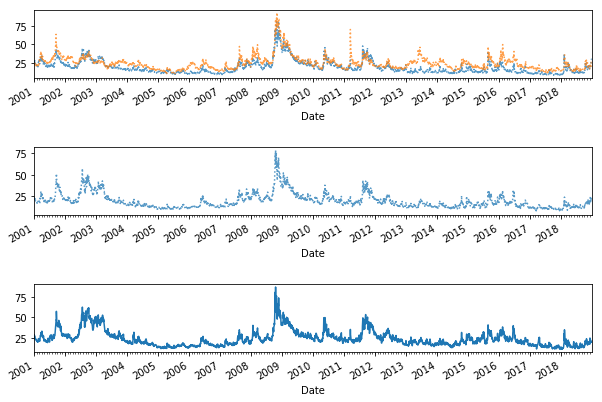

In [23]:
# Example of Matplotlib using
import matplotlib.pyplot as plt
fig_group, axes_group = plt.subplots(3, 1, figsize = (10, 7))
plt.subplots_adjust(hspace = 1)
df_raw_data['iv_us'].plot(ax = axes_group[0], alpha = 0.75, linestyle = ':')
df_raw_data['iv_jp'].plot(ax = axes_group[0], alpha = 0.75, linestyle = ':')
df_raw_data['iv_uk'].plot(ax = axes_group[1], alpha = 0.75, linestyle = ':')
df_raw_data['iv_eu'].plot(ax = axes_group[2], alpha = 1)
for ax_group in axes_group:
    ax_group.xaxis.set_major_locator(mdates.YearLocator())
    ax_group.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax_group.xaxis.set_minor_locator(mdates.MonthLocator())
    ax_group.set_xlim(standart_date_stamp, last_date_stamp)   

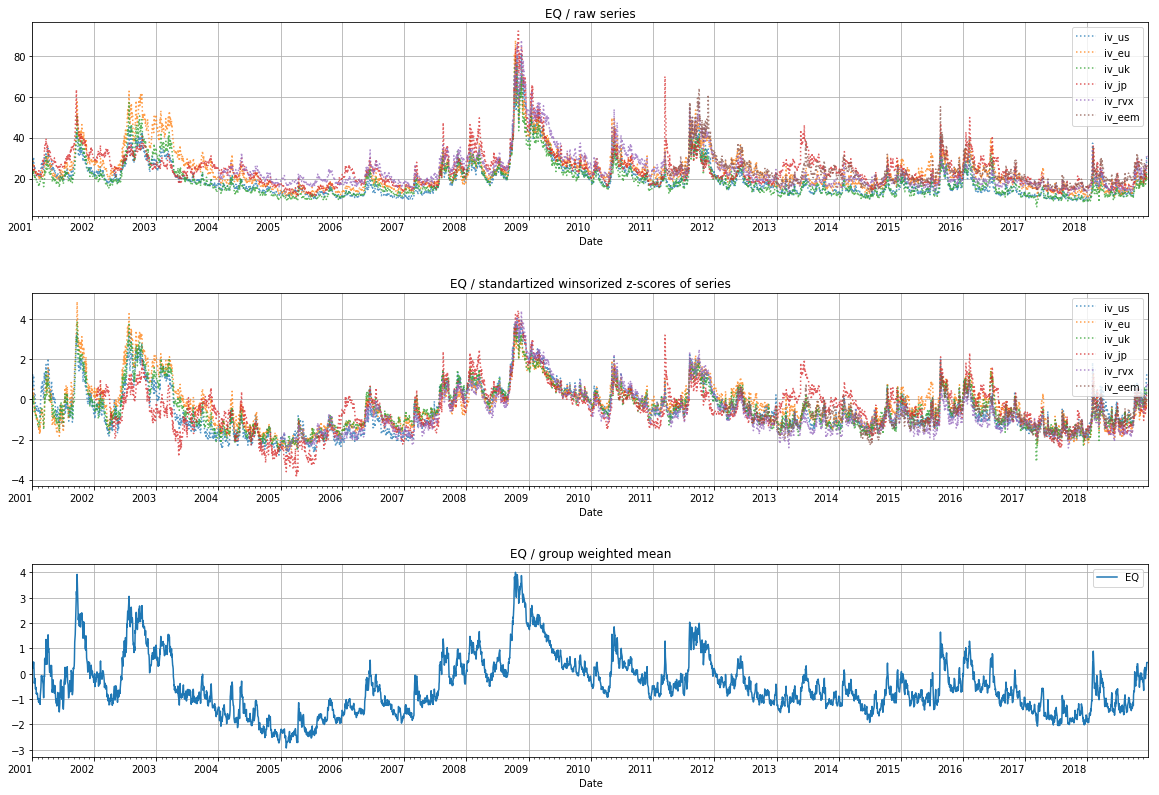

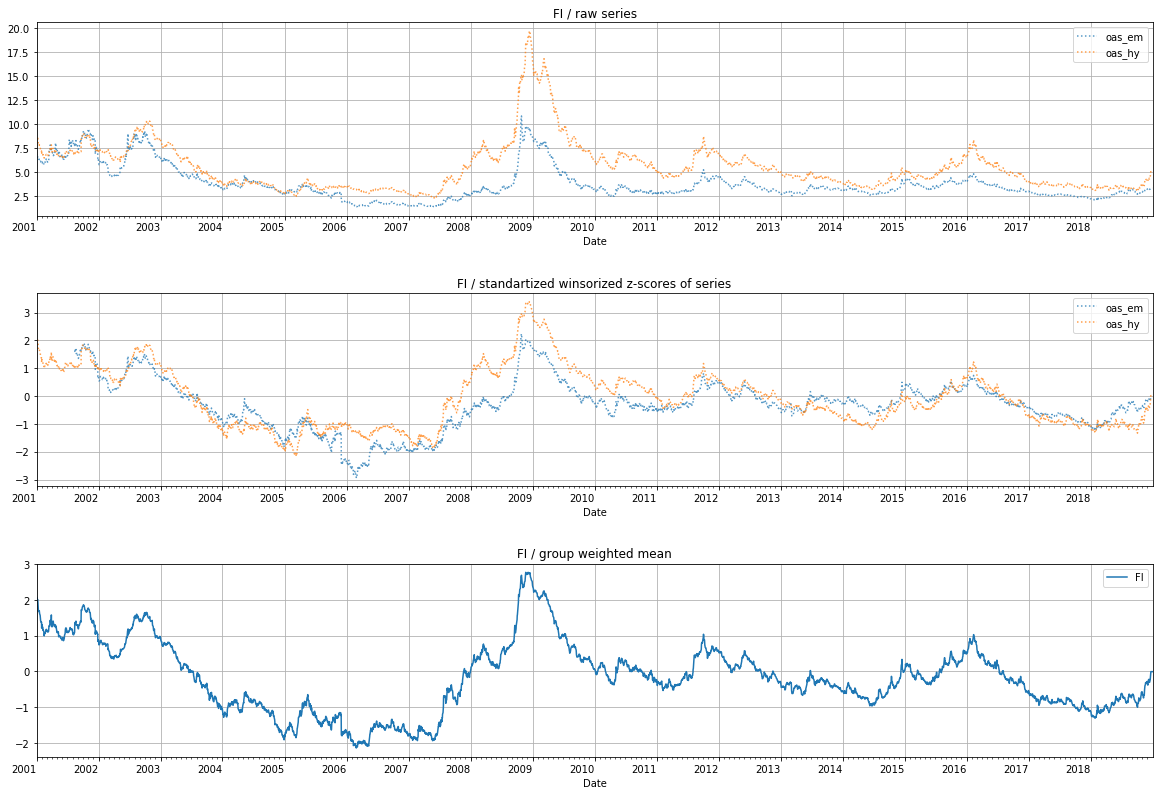

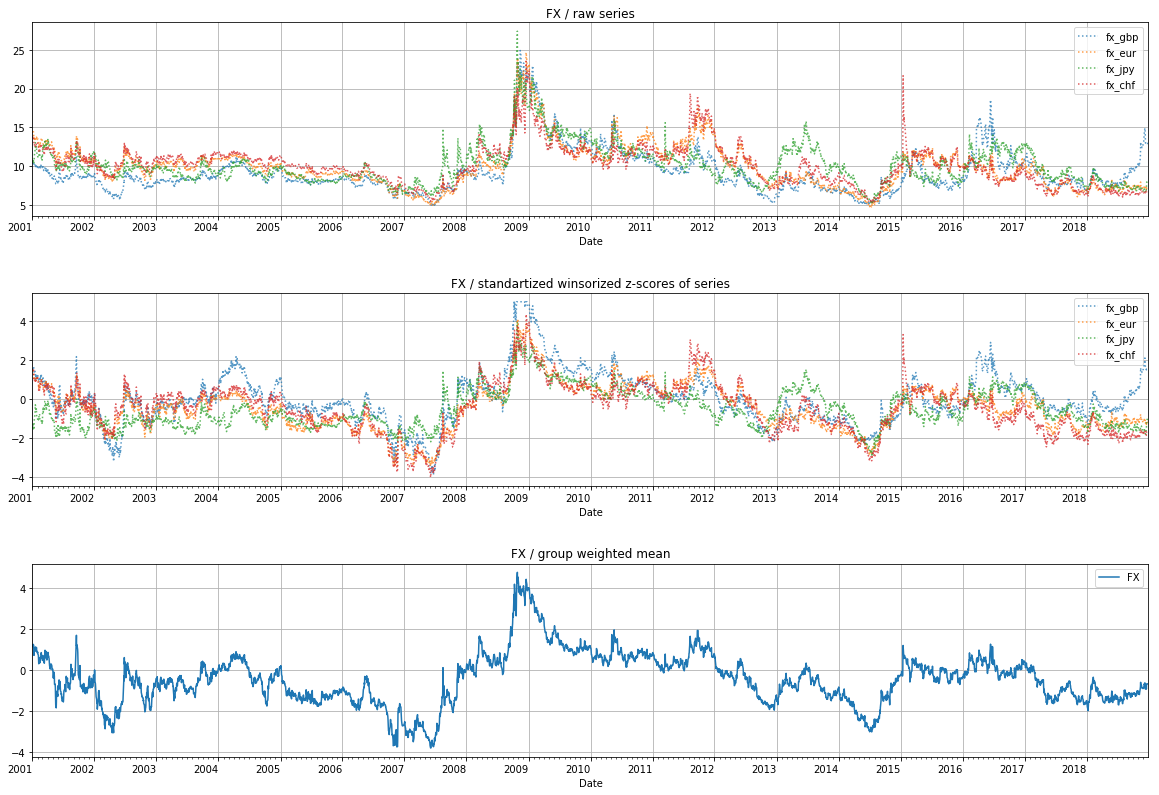

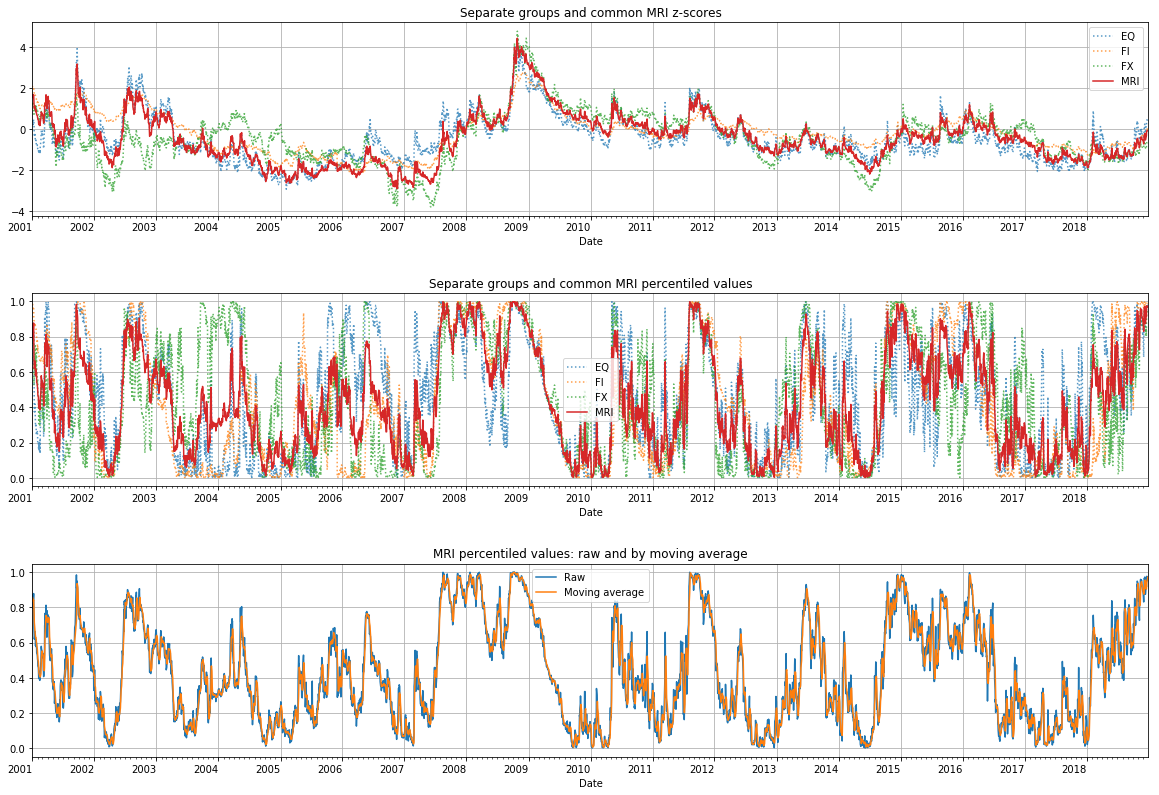

In [18]:
# HDF5 with asset level info
path_mri_assets_hdf = 'Data_Files/Source_Files/mri_released_assets.h5'
object_selected_data_hdf = 'selected_data'
object_standartized_data_hdf = 'standartized_data'

# HDF5 with group level info
path_mri_groups_hdf = 'Data_Files/Source_Files/mri_released_groups.h5'
object_diag_grouped_hdf = 'diag_grouped_data'
object_perc_grouped_hdf = 'percentile_grouped_data'

# HDF5 with MRI level info
path_mri_index_hdf = 'Data_Files/Source_Files/mri_released_index.h5'
object_diag_mri_hdf = 'diag_MRI_data'
object_raw_perc_mri_hdf = 'raw_perc_MRI_data'
object_ma_perc_mri_hdf = 'ma_perc_MRI_data'

# Generating plots
MRI_figure_size = (20, 15)
MRI_figure_hspace = 0.4
dict_fig_result = hh_matplotlib_mri_data(df_model_asset, df_model_MRI, path_mri_assets_hdf, path_mri_groups_hdf, path_mri_index_hdf, 
                 object_selected_data_hdf, object_standartized_data_hdf, object_diag_grouped_hdf, object_perc_grouped_hdf, 
                 object_diag_mri_hdf, object_raw_perc_mri_hdf, object_ma_perc_mri_hdf, MRI_figure_size, MRI_figure_hspace, standart_date_stamp, last_date_stamp)

plt.show()

In [17]:
# Example of importing risk events file data
risk_file_path = 'Data_Files/Source_Files/Risk events.xlsx'
risk_tab_name = 'List'

df_risk_events = hh_get_xlsx_risk_events(risk_file_path, risk_tab_name)
df_risk_events.head()

Risk event        Short label  \
No                                                                 
1                      Fed rate hike surprise  Fed hike surprise   
2   Mexican ''tequila'', Orange county crisis                NaN   
3                                Asian crisis       Asian crisis   
4              Russian financial crisis, LTCM               LTCM   
5                     Brazil financial crisis                NaN   

           Type of risk event  Flag Begin date   End date  
No                                                         
1              Sovereign debt     1 1994-02-01 1994-07-31  
2               FX, muni debt     0 1994-12-06 1995-05-31  
3   FX, Sovereign debt,Equity     1 1997-07-02 1997-12-31  
4              Sovereign debt     1 1998-05-18 1998-09-30  
5                          FX     0 1999-01-15 1999-05-30

In [18]:
# HDF5 with asset level info
path_mri_assets_hdf = 'Data_Files/Source_Files/mri_released_assets.h5'
object_selected_data_hdf = 'selected_data'
object_standartized_data_hdf = 'standartized_data'

# HDF5 with group level info
path_mri_groups_hdf = 'Data_Files/Source_Files/mri_released_groups.h5'
object_diag_grouped_hdf = 'diag_grouped_data'
object_perc_grouped_hdf = 'percentile_grouped_data'

# HDF5 with MRI level info
path_mri_index_hdf = 'Data_Files/Source_Files/mri_released_index.h5'
object_diag_mri_hdf = 'diag_MRI_data'
object_raw_perc_mri_hdf = 'raw_perc_MRI_data'
object_ma_perc_mri_hdf = 'ma_perc_MRI_data'

In [19]:
# Exapmles of project data extracting from HDF5 files
df_raw_data = pd.read_hdf(path_mri_assets_hdf, object_selected_data_hdf)
df_raw_data.set_index('Date', drop = True, inplace = True)
df_standart_data = pd.read_hdf(path_mri_assets_hdf, object_standartized_data_hdf)
df_standart_data.set_index('Date', drop = True, inplace = True)
df_group_diag = pd.read_hdf(path_mri_groups_hdf, object_diag_grouped_hdf)
df_group_diag.set_index('Date', drop = True, inplace = True)
df_group_perc = pd.read_hdf(path_mri_groups_hdf, object_perc_grouped_hdf)
df_group_perc.set_index('Date', drop = True, inplace = True)
ser_mri_diag = pd.read_hdf(path_mri_index_hdf, object_diag_mri_hdf)
ser_mri_raw_perc = pd.read_hdf(path_mri_index_hdf, object_raw_perc_mri_hdf)
ser_mri_ma_perc = pd.read_hdf(path_mri_index_hdf, object_ma_perc_mri_hdf)

# Importing risk events periods
risk_file_path = 'Data_Files/Source_Files/Risk events.xlsx'
risk_tab_name = 'List'
df_risk_events = hh_get_xlsx_risk_events(risk_file_path, risk_tab_name)

In [20]:
# Example of bokeh using
from bokeh.palettes import Set2, Set3
import bokeh.plotting as b_pl
import bokeh.models as b_md
b_pl.output_notebook()

fig_group_raw = b_pl.figure(tools = 'pan, box_zoom, wheel_zoom, reset', x_axis_label = 'Date', plot_width = 1200, plot_height = 250,
                            x_axis_type = 'datetime', title = 'EQ' + ' / raw series',
                            x_range = (standart_date_stamp, last_date_stamp))

num_asset_lines = len(df_model_asset[df_model_asset['Asset Group'] == 'EQ']['Asset Code'])
palette_asset_lines = Set2[8][ : num_asset_lines]
for asset_number, asset_code in enumerate(df_model_asset[df_model_asset['Asset Group'] == 'EQ']['Asset Code']):
    fig_group_raw.line(x = df_raw_data.index.values, y = df_raw_data[asset_code].values, 
                       line_color = palette_asset_lines[asset_number], 
                       legend = asset_code, 
                       line_width = 1, name = asset_code)

arr_risk_band = []
for event_counter, ser_event in df_risk_events.iterrows():
    risk_band = b_md.BoxAnnotation(left = ser_event['Begin date'], right = ser_event['End date'], fill_alpha=0.1, fill_color='red')    
    arr_risk_band.append(risk_band)
    
for risk_band in arr_risk_band:
    fig_group_raw.add_layout(risk_band)
fig_group_raw.add_tools(b_md.HoverTool(tooltips = [('This date', '@x{%F}')], formatters = {'x': 'datetime'}, names = ['iv_us']))
fig_group_raw.legend.location = 'top_left'   
fig_group_raw.legend.background_fill_alpha  = 0.75
fig_group_raw.legend.spacing  = 0
fig_group_raw.xaxis.axis_label_standoff = 0
fig_group_raw.title.align = 'center'
fig_group_raw.min_border_bottom = 75
b_pl.show(fig_group_raw)

Loading BokehJS ...

In [17]:
# Drawin interactive bokeh plots
import bokeh.plotting as b_pl
# HDF5 with asset level info
path_mri_assets_hdf = 'Data_Files/Source_Files/mri_released_assets.h5'
object_selected_data_hdf = 'selected_data'
object_standartized_data_hdf = 'standartized_data'

# HDF5 with group level info
path_mri_groups_hdf = 'Data_Files/Source_Files/mri_released_groups.h5'
object_diag_grouped_hdf = 'diag_grouped_data'
object_perc_grouped_hdf = 'percentile_grouped_data'

# HDF5 with MRI level info
path_mri_index_hdf = 'Data_Files/Source_Files/mri_released_index.h5'
object_diag_mri_hdf = 'diag_MRI_data'
object_raw_perc_mri_hdf = 'raw_perc_MRI_data'
object_ma_perc_mri_hdf = 'ma_perc_MRI_data'

# Importing risk events periods
risk_file_path = 'Data_Files/Source_Files/Risk events.xlsx'
risk_tab_name = 'List'
df_risk_events = hh_get_xlsx_risk_events(risk_file_path, risk_tab_name)
      
# Generating plots
MRI_figure_size = (1200, 250)
MRI_toolbar =  'pan, box_zoom, wheel_zoom, reset'
arr_fig_result = hh_bokeh_mri_data(df_model_asset, df_model_MRI, path_mri_assets_hdf, path_mri_groups_hdf, path_mri_index_hdf, object_selected_data_hdf, 
                                   object_standartized_data_hdf, object_diag_grouped_hdf, object_perc_grouped_hdf, object_diag_mri_hdf, object_raw_perc_mri_hdf, 
                                   object_ma_perc_mri_hdf, MRI_figure_size, MRI_toolbar, standart_date_stamp, last_date_stamp, df_risk_events)

for figure_counter, fig_result in enumerate(arr_fig_result):
    # Defining output to html file
#    b_pl.output_file('MRI_plot_' + str(figure_counter) + '.html')    
    b_pl.show(fig_result)

Loading BokehJS ...

In [7]:
# Importing country codes from site
df_country_codes = hh_get_country_codes()
print(df_country_codes.head())

# Importing information about MSCI indexes membership from soutce file
path_msci_index_membership = 'Data_Files/Source_Files/msci_index_countries.xlsx'
[df_index_class, df_index_member] = hh_get_msci_index_membership(path_msci_index_membership)
print(df_index_class.head())
print(df_index_member.head())

# Importing information about MSCI indexes membership from soutce file
path_msci_reclassifications = 'Data_Files/Source_Files/msci_reclassifications.xlsx'
df_reclass = hh_get_msci_reclassification(path_msci_reclassifications)
print(df_reclass.head())

# Importing and consolidating MSCI returns info from all suitable files in current directory
dir_MSCI_returns_str = 'Data_Files/Source_Files/MSCI_Returns/'
df_returns_USD = hh_get_msci_returns(dir_MSCI_returns_str + 'Standard_Net_USD_None_None/')
print(df_returns_USD.tail())
df_returns_LOC = hh_get_msci_returns(dir_MSCI_returns_str + 'Standard_Net_LOC_None_None/')
print(df_returns_LOC.tail())

               ISO SHORT ISO LONG
COUNTRY                          
Afghanistan           AF      AFG
Albania               AL      ALB
Algeria               DZ      DZA
American Samoa        AS      ASM
Andorra               AD      AND
                                   Market Type
Index Name                                    
DM                           Developed Markets
EAFE                         Developed Markets
EAFE + CANADA                Developed Markets
EAFE VOTING RIGHTS-ADJUSTED  Developed Markets
EAFE ex ISRAEL               Developed Markets
                 Member Member Code
Index Name                         
DM              Austria          AT
DM            Australia          AU
DM              Belgium          BE
DM               Canada          CA
DM          Switzerland          CH
    Country From Class To Class Change Date
1  Pakistan         FM       EM  2017-06-01
2     WAEMU         SM       FM  2016-12-01
3  Bulgaria         FM       SM  2016-09-01
4   U

In [45]:
############################################################################################################################################################################

In [97]:
import os

date_format = '%Y-%m-%d'
arr_from_file = []
dir_MSCI_returns_str = 'Data_Files/Source_Files/MSCI_Returns/'
dir_MSCI_returns_byte = os.fsencode(dir_MSCI_returns_str)
for history_file_byte in os.listdir(dir_MSCI_returns_byte):
    history_file_str = os.fsdecode(history_file_byte)
    if history_file_str.startswith('historyIndex') and history_file_str.endswith('.xls'): 
        df_from_file = pd.read_excel(dir_MSCI_returns_str + history_file_str, skiprows = 6, header = 0, dtype={'Date': str})
        df_from_file = df_from_file[ : df_from_file['Date'].isnull().idxmax()]        
        df_from_file['Date'] = pd.to_datetime(df_from_file['Date'], format = date_format)
        df_from_file.set_index('Date', drop = True, inplace = True)
        df_from_file.columns = df_from_file.columns.str.extract('(.+?)( .+)')[0]
        arr_from_file.append(df_from_file)
df_returns = pd.concat(arr_from_file, axis = 1, join = 'outer')

In [98]:
df_returns

0           AUSTRALIA  AUSTRIA  BELGIUM   CANADA   DENMARK     EAFE  \
Date                                                                  
1969-12-31     100.00   100.00   100.00   100.00    100.00   100.00   
1970-01-30      96.87   100.01   101.05   102.45    100.54    98.83   
1970-02-27      95.75    98.84   101.24   107.00     98.96    96.50   
1970-03-31      95.42    98.28   101.91   108.09     96.50    97.96   
1970-04-30      84.74   100.84   100.87    95.73     92.87    89.74   
1970-05-29      79.25   100.97    97.05    86.63     89.25    85.23   
1970-06-30      89.49   103.58    98.03    86.95     89.31    87.03   
1970-07-31      92.34   104.82   103.89    92.54     85.98    90.44   
1970-08-31      91.62   109.33   103.64    95.99     90.53    90.76   
1970-09-30      91.75   111.36   104.57   102.25     87.45    91.38   
1970-10-30      83.33   109.99   106.10   101.03     89.55    90.53   
1970-11-30      79.25   110.72   104.68   105.62     90.83    86.58   
1970-12-31      80.23   110.84   106.91   107.62     91.70    88.34   
1971-01-29      78.42   109.37   116.08   111.06     92.72    91.85   
1971-02-26      76.95   110.47   119.34   110.77     90.39    92.60   
1971-03-31      81.19   109.18   117.05   115.66     87.40    96.53   
1971-04-30      78.23   111.13   120.69   115.37     87.62   100.19   
1971-05-31      76.04   111.28   122.25   112.45     86.71   101.32   
1971-06-30      76.74   110.07   123.56   113.22     87.01   103.45   
1971-07-30      73.67   110.99   128.43   113.00     91.52   107.62   
1971-08-31      69.48   109.08   122.80   116.79     93.42   102.65   
1971-09-30      62.33   108.99   115.98   115.31     93.21   100.21   
1971-10-29      62.61   109.84   112.16   109.01     92.80    96.56   
1971-11-30      61.67   108.13   114.85   108.79     90.01    99.33   
1971-12-31      73.55   109.08   116.97   121.00     93.28   105.24   
1972-01-31      71.27   108.41   122.13   127.13     97.94   109.58   
1972-02-29      78.56   111.44   127.88   131.28    101.36   115.81   
1972-03-31      81.17   110.50   133.90   130.63    100.49   118.81   
1972-04-28      79.61   112.22   134.67   130.89    107.03   121.90   
1972-05-31      83.06   120.08   135.83   136.34    115.68   125.46   
...               ...      ...      ...      ...       ...      ...   
2016-07-29    4761.60  1050.59  7442.08  5493.53  21157.35  2779.36   
2016-08-31    4689.36  1080.45  7419.88  5544.77  19903.63  2805.40   
2016-09-30    4718.34  1127.61  7654.96  5615.33  18929.91  2813.64   
2016-10-31    4644.18  1203.12  7175.24  5675.53  18179.62  2847.12   
2016-11-30    4800.29  1221.13  7011.06  5829.28  17418.01  2882.13   
2016-12-30    5020.83  1279.61  7193.63  5916.46  18380.65  3012.58   
2017-01-31    4993.34  1316.93  7026.43  5966.14  18740.44  3015.47   
2017-02-28    5115.29  1339.11  7283.91  5965.30  18957.31  3080.22   
2017-03-31    5288.92  1374.98  7458.14  6031.26  19235.78  3154.52   
2017-04-28    5357.24  1481.08  7564.15  6052.46  20355.55  3198.57   
2017-05-31    5170.16  1569.17  7684.75  5964.97  20938.21  3265.32   
2017-06-30    5161.46  1571.01  7332.61  5910.67  20796.02  3239.94   
2017-07-31    5179.62  1653.77  7696.22  5916.09  21018.92  3261.76   
2017-08-31    5202.42  1665.71  7539.10  5938.60  21573.83  3260.53   
2017-09-29    5203.93  1707.78  7727.74  6142.87  21629.87  3348.76   
2017-10-31    5401.08  1769.20  7970.14  6317.85  22264.11  3448.06   
2017-11-30    5483.42  1773.43  7611.50  6352.82  21410.40  3430.24   
2017-12-29    5574.80  1779.36  7491.33  6416.24  21774.93  3471.41   
2018-01-31    5543.88  1901.45  7612.20  6340.49  21635.36  3513.15   
2018-02-28    5560.82  1832.04  7452.17  6136.52  21500.66  3398.64   
2018-03-30    5334.67  1775.29  7351.24  6116.76  20976.48  3322.95   
2018-04-30    5553.47  1780.79  7227.37  6230.38  20882.77  3472.34   
2018-05-31    5619.73  1708.66  7072.95  6428.83  21031.59  3448.95   
2018-06-29    5826.27  1